In [1]:
import os 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

src_dir = os.getcwd()
features_dir = os.path.join(src_dir, 'dataset')

# Loading features and targets
data_df = pd.read_csv(os.path.join(features_dir, 'features.csv'), sep=',')

targets = data_df['Genre'].values ## Genre columns should be our targets
genres = sorted(list(np.unique(targets))) ## list with our 10 possible classes
enc = enc.fit(genres)
targets_enc = enc.transform(targets) ## Converting string targets into numbers.

features = data_df.drop(columns=['Name', 'Genre']).values ## dropping non-feature columns

#print(targets)
#print(features)
print(targets_enc.shape)
print(features.shape)

(6000,)
(6000, 20)


## Visualising our data
We can PCA on our features and heavily compress them to only 2 principal components just to visualise our data. By doing so, we can have more insights on how hard some classes will be to classify.

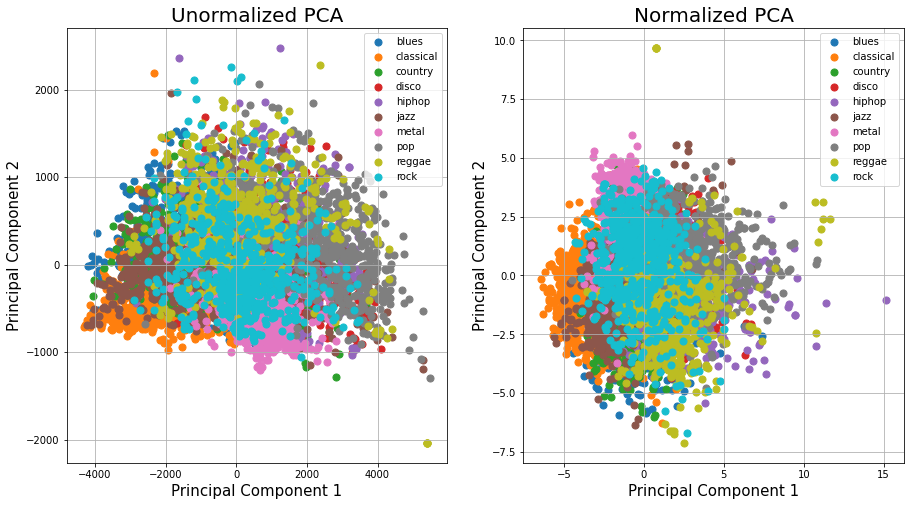

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## PCA without normalising features
pca_ = PCA(n_components=2)
pca = pca_.fit_transform(features)
#print(pca_.explained_variance_ratio_)
features_pca = pd.DataFrame(pca, columns = ['Principal Component 1', 'Principal Component 2'])
data_pca_df = pd.concat([features_pca, data_df['Genre']], axis = 1)

## PCA normalising features
scaler_ = StandardScaler()
scaled_features = scaler_.fit_transform(features)
pca = pca_.fit_transform(scaled_features)
#print(pca_.explained_variance_ratio_)
features_pca = pd.DataFrame(pca, columns = ['Principal Component 1', 'Principal Component 2'])
data_pca_norm_df = pd.concat([features_pca, data_df['Genre']], axis = 1)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (15,8))

ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('Unormalized PCA', fontsize = 20)
ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_title('Normalized PCA', fontsize = 20)

#genres = ['blues', 'classical', 'country', 'disco', 'hiphop']
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'w']
for g, color in zip(genres,colors):
    ax1.scatter(data_pca_df.loc[data_pca_df['Genre'] == g, 'Principal Component 1'], 
                data_pca_df.loc[data_pca_df['Genre'] == g, 'Principal Component 2'],
                c = color, s = 50)
    ax2.scatter(data_pca_norm_df.loc[data_pca_df['Genre'] == g, 'Principal Component 1'], 
                data_pca_norm_df.loc[data_pca_df['Genre'] == g, 'Principal Component 2'],
                c = color, s = 50)
    
ax1.legend(genres)
ax1.grid()
ax2.legend(genres)
ax2.grid()

#print(features_pca.head(5))


As you can see on the previous plots, even when using only 2 principal components of our initial 20 features, we can see there is some separation between the classes. As we might have expected, the rock genre formed a cloud in the middle of our 2D-plot, reflecting the higher variance of this particular genre if compared to other classes. 

Just by ignoring rock, look how more separable our classes appear.  

NameError: name 't' is not defined

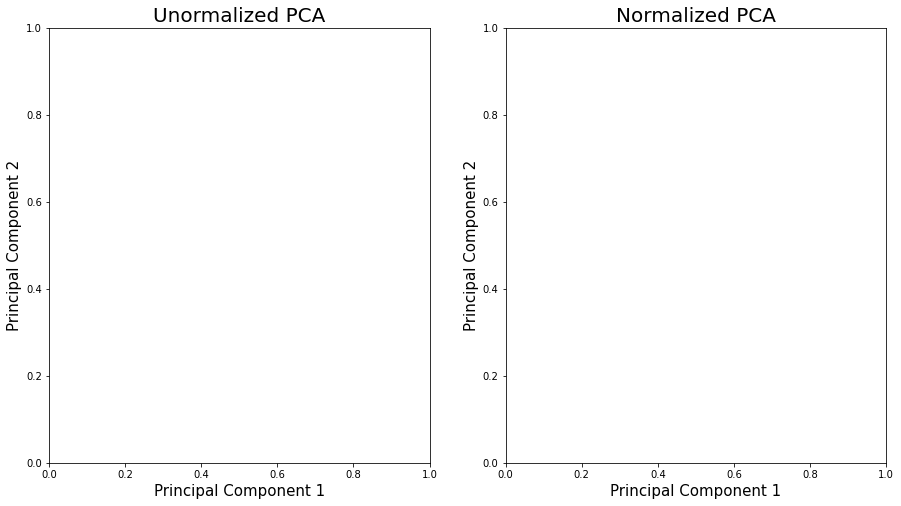

In [3]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (15,8))

ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('Unormalized PCA', fontsize = 20)
ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_title('Normalized PCA', fontsize = 20)

#genres = ['blues', 'classical', 'country', 'disco', 'hiphop']
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'w']
for g, color in zip(genres[:-1],colors[:-1]):
    ax1.scatter(data_pca_df.loc[data_pca_df['Genre'] == g, 'Principal Component 1'], 
                data_pca_df.loc[data_pca_df['Genre'] == g, 'Principal Component 2'],
                c = color, s = 50)
    ax2.scatter(data_pca_norm_df.loc[data_pca_df['Genre'] == g, 'Principal Component 1'], 
                data_pca_norm_df.loc[data_pca_df['Genre'] == g, 'Principal Component 2'],
                c = color, s = 50)
    
ax1.legend(genres[:-1])
ax1.grid()
ax2.legend(genres[:-1])
ax2.grid()

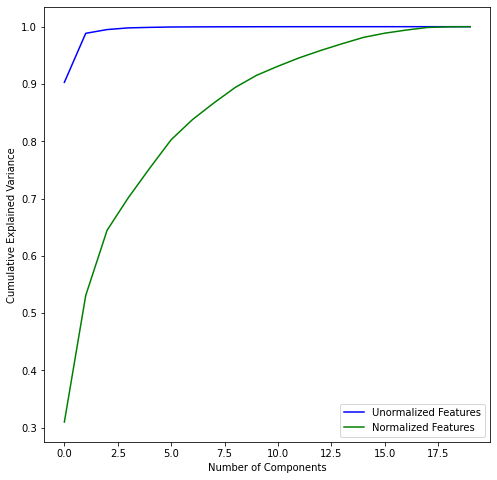

In [ ]:
pca = PCA().fit(features)
pca_norm = PCA().fit(scaled_features)

fig, ax = plt.subplots( figsize = (8,8))
ax.plot(np.cumsum(pca.explained_variance_ratio_), color='blue', label='Unormalized Features')
ax.plot(np.cumsum(pca_norm.explained_variance_ratio_), color='green', label='Normalized Features')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Cumulative Explained Variance')
ax.legend()

## Evaluation and Hyperparameter Search:

In order to be able to evaluate our classification results, we need to set up a train/test split for our dataset. We are going to use 75% of the clips for training and 25% for testing. It is also good to normalise the features, which usually facilitates learning and improve results. But we are going to test models trained both using normalised features or unormalised ones. 

Furthermore, we will perform PCA and vary the number of componests to see how many components should be use to get the best results for each model.

Another important topic we will brief try to discuss here is hyperparameter search. Machine leaerning models have hyperparameters that have to be set beforehand. Some models have a lot of hyperparameters that ideally should be tweaked, but since this assignment is just to give an overall overview, I will perform a small single hyperparameter search for every model we are going to train.

Splitting dataset into training set and test set:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets_enc, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=2022) # 80% training and 20% test

scaler_ = StandardScaler()
X_train_norm = scaler_.fit_transform(X_train)
X_test_norm = scaler_.transform(X_test)

We are going to write a function `tuneModelAndPCA` that will tune a particular hyperparameter of a model and also evaluate the results when using or not using PCA.

In [ ]:
from tqdm.notebook import tqdm
from sklearn.metrics import f1_score, accuracy_score

def tuneModelAndPCA(ModelType, PCA_range, param_name, param_range, norm_data=True, **kwargs):
    """This function receives a scikit-learn model class with corresponding hyperparameter
       name and performs a hyperparameter search based on a provided grid. It also tests
       the model using different numbers of PCA components

        Args:
            ModelType (scikit-learn model): Model to be trained
            PCA_range (iterable): Grid with number of PCA components to be searched
            param_name (str): Name of parameter passed to function sklearn.Modeltype(**kwargs[param_name])
            param_range (iterable): Grid with possible values of parameters to be searched
            norm_data (bool, optional): Wether to use normalised data or not. Defaults to True.
        Returns:
            (tuple of dict): [f1_score_macro, f1_score_micro, accuracy_score]. Scores for every possible combination of PCA and Hyperparameter

        """ 
    
    global X_train_norm
    global X_test_norm
    global X_train
    global X_test
    global y_train
    global y_test

    if norm_data:
        X = X_train_norm
        Xt = X_test_norm
    else:
        X = X_train
        Xt = X_test

    ## Dictionaries to store best scores
    f1_scores_mac = {}
    f1_scores_mic = {}
    acc_scores = {} 

    for comp in tqdm(PCA_range, desc="Tuning number of PCA components and hyperparameter...", position=0):
        f1_scores_mac[comp] = []
        f1_scores_mic[comp] = []
        acc_scores[comp] = []
        if comp != X.shape[1]:
            pca_ = PCA(n_components=comp)
            X_train_pca = pca_.fit_transform(X)
            X_test_pca = pca_.transform(Xt)

        for param in param_range: #tqdm(param_range, desc="Testing different values for hyperparameter...", position=0, leave=False):
            kwargs[param_name] = param
            
            # Create Classifier of ModelType with hyperparameter to tweak
            model = ModelType(**kwargs)

            if comp != X.shape[1]:
                #Train the model using the training set
                model.fit(X_train_pca, y_train)
                #Predict the response for test dataset
                y_pred = model.predict(X_test_pca)
            else:
                # Dont need to use PCA compressed features
                model.fit(X, y_train)
                y_pred = model.predict(Xt)
            
            f1_macro = f1_score(y_test, y_pred, average='macro')
            f1_micro = f1_score(y_test, y_pred, average='micro')
            acc = accuracy_score(y_test, y_pred)

            f1_scores_mac[comp].append(f1_macro)
            f1_scores_mic[comp].append(f1_micro)
            acc_scores[comp].append(acc)

    return (f1_scores_mac, f1_scores_mic, acc_scores)

# for comp in tqdm(components, desc="Testing different number of PCA components...", position=0):
#     f1_scores_mac[comp] = []
#     f1_scores_mic[comp] = []
#     acc_scores[comp] = []
#     if comp != X_train.shape[1]:
#         pca_ = PCA(n_components=comp)
#         X_train_pca = pca_.fit_transform(X_train)
#         X_test_pca = pca_.transform(X_test)

#     for neigh in tqdm(neighbors, desc="Testing different numbers of neighbors for KNN...", position=0, leave=False):

#         #Create KNN Classifier
#         knn = KNeighborsClassifier(n_neighbors=neigh)

#         if comp != X_train.shape[1]:
#             #Train the model using the training set
#             knn.fit(X_train_pca, y_train)
#             #Predict the response for test dataset
#             y_pred = knn.predict(X_test_pca)
#         else:
#             knn.fit(X_train, y_train)
#             #Predict the response for test dataset
#             y_pred = knn.predict(X_test)
        
#         f1_macro = f1_score(y_test, y_pred, average='macro')
#         f1_micro = f1_score(y_test, y_pred, average='micro')
#         acc = accuracy_score(y_test, y_pred)

#         f1_scores_mac[comp].append(f1_macro)
#         f1_scores_mic[comp].append(f1_micro)
#         acc_scores[comp].append(acc)

def createEvalDataframe(f1_scores_mac, f1_scores_mic, acc_scores, PCA_range, param_range):
    """[summary]

    Args:
        f1_scores_mac ([type]): [description]
        f1_scores_mic ([type]): [description]
        acc_scores ([type]): [description]
        PCA_range ([type]): [description]
        param_range ([type]): [description]

    Returns:
        [type]: [description]
    """

    ind = pd.MultiIndex.from_product([param_range,['F1_macro', 'F1_micro', 'Accuracy']] , names=['Hyperparameter', "Scores"])

    scs = []
    for comp in PCA_range:
        x = list(zip(f1_scores_mac[comp], f1_scores_mic[comp], acc_scores[comp]))
        v = [s for sc in x for s in sc]
        scs.append(v)

    df = pd.DataFrame(data=np.array(scs).T, index=ind, columns=['PCA_{}'.format(str(comp)) for comp in PCA_range])
    
    df.head(30)
    return df

#df.groupby(['scores']).idxmax(axis='columns')
#print(df.groupby(['scores']).max().max(axis='columns'))
#print(df.groupby(['scores']).max().idxmax(axis='columns'))
#print('\n')
def getBestResults(df, param_name='HyperParameter', verbose=True):
    best_f1_mac = df.groupby(['Scores']).max().max(axis='columns')['F1_macro']
    best_f1_mic = df.groupby(['Scores']).max().max(axis='columns')['F1_micro']
    best_acc = df.groupby(['Scores']).max().max(axis='columns')['Accuracy']

    best_PCA_f1_mac = df.groupby(['Scores']).max().idxmax(axis='columns')['F1_macro']
    best_PCA_f1_mic = df.groupby(['Scores']).max().idxmax(axis='columns')['F1_micro']
    best_PCA_acc = df.groupby(['Scores']).max().idxmax(axis='columns')['Accuracy']

    best_param_f1_mac = df.groupby(['Scores'])[best_PCA_f1_mac].idxmax()['F1_macro'][0]
    best_param_f1_mic = df.groupby(['Scores'])[best_PCA_f1_mic].idxmax()['F1_micro'][0]
    best_param_acc = df.groupby(['Scores'])[best_PCA_acc].idxmax()['Accuracy'][0]
    
    best_scores = {
        'f1_mac': (best_f1_mac, int(best_PCA_f1_mac.split('_')[1]), best_param_f1_mac),
        'f1_mic': (best_f1_mic, int(best_PCA_f1_mic.split('_')[1]), best_param_f1_mic),
        'acc': (best_acc, int(best_PCA_acc.split('_')[1]), best_param_acc)
    }

    if verbose:
        print('Best achievable F1-macro was {:.4f}. When using {} PCA components and \'{}\' = {}'.format(best_f1_mac, 
                                                                                                   best_PCA_f1_mac.split('_')[1], 
                                                                                                   param_name,
                                                                                                   best_param_f1_mac))
        print('Best achievable F1-micro was {:.4f}. When using {} PCA components and \'{}\' = {}'.format(best_f1_mic, 
                                                                                                   best_PCA_f1_mic.split('_')[1],
                                                                                                   param_name, 
                                                                                                   best_param_f1_mic))
        print('Best achievable accuracy was {:.4f}. When using {} PCA components and \'{}\' = {}'.format(best_acc, 
                                                                                                   best_PCA_acc.split('_')[1], 
                                                                                                   param_name,
                                                                                                   best_param_acc))
    return best_scores
        

In [ ]:
min_PCA = 1
max_PCA = features.shape[1]
PCA_range = range(min_PCA, max_PCA+1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_range = range(1, 40)
param_name = 'n_neighbors'
ModelType = KNeighborsClassifier

print('Training and tweaking KNN neighbors using normalised data')
knn_scores_df_norm = createEvalDataframe(*tuneModelAndPCA(ModelType, PCA_range, param_name, param_range, norm_data=True),  
                                         PCA_range, 
                                         param_range)
knn_scores_norm = getBestResults(df=knn_scores_df_norm, param_name=param_name, verbose=True)

print('\n')
print('Training and tweaking KNN neighbors using unormalised data')
knn_scores_df = createEvalDataframe(*tuneModelAndPCA(ModelType, PCA_range, param_name, param_range, norm_data=False), 
                                    PCA_range, 
                                    param_range)
knn_scores = getBestResults(df=knn_scores_df, param_name=param_name, verbose=True)

Training and tweaking KNN neighbors using normalised data


Tuning number of PCA components and hyperparameter...:   0%|          | 0/20 [00:00<?, ?it/s]

Best achievable F1-macro was 0.8170. When using 19 PCA components and 'n_neighbors' = 1
Best achievable F1-micro was 0.8192. When using 19 PCA components and 'n_neighbors' = 1
Best achievable accuracy was 0.8192. When using 19 PCA components and 'n_neighbors' = 1


Training and tweaking KNN neighbors using unormalised data


Tuning number of PCA components and hyperparameter...:   0%|          | 0/20 [00:00<?, ?it/s]

Best achievable F1-macro was 0.4601. When using 16 PCA components and 'n_neighbors' = 1
Best achievable F1-micro was 0.4667. When using 15 PCA components and 'n_neighbors' = 4
Best achievable accuracy was 0.4667. When using 15 PCA components and 'n_neighbors' = 4


In [ ]:
from sklearn import tree

ModelType = tree.DecisionTreeClassifier
param_name = 'max_depth'
param_range = range(1,40)

print('Training and tweaking Decision Tree Classifier using normalised data')
scores_df_norm = createEvalDataframe(*tuneModelAndPCA(ModelType, PCA_range, param_name, param_range, norm_data=True),  
                                         PCA_range, 
                                         param_range)
scores_norm = getBestResults(df=scores_df_norm, param_name=param_name, verbose=True)

print('\n')
print('Training and tweaking Decision Tree Classifier using unormalised data')
scores_df = createEvalDataframe(*tuneModelAndPCA(ModelType, PCA_range, param_name, param_range, norm_data=False), 
                                    PCA_range, 
                                    param_range)
scores = getBestResults(df=scores_df, param_name=param_name, verbose=True)

Training and tweaking Decision Tree Classifier using normalised data


Tuning number of PCA components and hyperparameter...:   0%|          | 0/20 [00:00<?, ?it/s]

Best achievable F1-macro was 0.5750. When using 20 PCA components and 'max_depth' = 39
Best achievable F1-micro was 0.5742. When using 20 PCA components and 'max_depth' = 39
Best achievable accuracy was 0.5742. When using 20 PCA components and 'max_depth' = 39


Training and tweaking Decision Tree Classifier using unormalised data


Tuning number of PCA components and hyperparameter...:   0%|          | 0/20 [00:00<?, ?it/s]

Best achievable F1-macro was 0.6050. When using 15 PCA components and 'max_depth' = 29
Best achievable F1-micro was 0.6100. When using 15 PCA components and 'max_depth' = 29
Best achievable accuracy was 0.6100. When using 15 PCA components and 'max_depth' = 29


In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

ModelType=SVC
param_name= 'kernel'
param_range=['linear', 'poly', 'rbf', 'sigmoid']

print('Training and tweaking SVM Classifier using normalised data')
scores_df_norm = createEvalDataframe(*tuneModelAndPCA(ModelType, PCA_range, param_name, param_range, norm_data=True),  
                                         PCA_range, 
                                         param_range)
scores_norm = getBestResults(df=scores_df_norm, param_name=param_name, verbose=True)

print('\n')
print('Training SVM Classifier using unormalised data is unpractical')

ModelType=SGDClassifier
param_name= 'alpha' #
param_range=np.linspace(0.0001, 0.5, 50) #l2 regularization factor

print('Training and tweaking a Linear SVM Classifier using normalised data')
scores_df_norm = createEvalDataframe(*tuneModelAndPCA(ModelType, PCA_range, param_name, param_range, norm_data=True),  
                                         PCA_range, 
                                         param_range)
scores_norm = getBestResults(df=scores_df_norm, param_name=param_name, verbose=True)

print('\n')
print('Training and tweaking a Linear SVM Classifier using unormalised data')
scores_df = createEvalDataframe(*tuneModelAndPCA(ModelType, PCA_range, param_name, param_range, norm_data=False), 
                                    PCA_range, 
                                    param_range)
scores = getBestResults(df=scores_df, param_name=param_name, verbose=True)



Training and tweaking SVM Classifier using normalised data


Tuning number of PCA components and hyperparameter...:   0%|          | 0/20 [00:00<?, ?it/s]

Best achievable F1-macro was 0.7118. When using 20 PCA components and 'kernel' = rbf
Best achievable F1-micro was 0.7183. When using 19 PCA components and 'kernel' = rbf
Best achievable accuracy was 0.7183. When using 19 PCA components and 'kernel' = rbf


Training SVM Classifier using unormalised data is unpractical
Training and tweaking a Linear SVM Classifier using normalised data


Tuning number of PCA components and hyperparameter...:   0%|          | 0/20 [00:00<?, ?it/s]

Best achievable F1-macro was 0.5498. When using 18 PCA components and 'alpha' = 0.0001
Best achievable F1-micro was 0.5633. When using 18 PCA components and 'alpha' = 0.0001
Best achievable accuracy was 0.5633. When using 18 PCA components and 'alpha' = 0.0001


Training and tweaking a Linear SVM Classifier using unormalised data


Tuning number of PCA components and hyperparameter...:   0%|          | 0/20 [00:00<?, ?it/s]

Best achievable F1-macro was 0.4228. When using 17 PCA components and 'alpha' = 0.4897979591836735
Best achievable F1-micro was 0.4567. When using 13 PCA components and 'alpha' = 0.37757551020408164
Best achievable accuracy was 0.4567. When using 13 PCA components and 'alpha' = 0.37757551020408164


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

ModelType=GaussianNB
param_name= 'priors'
param_range=[None]

print('Training a Naive Bayes using normalised data')
scores_df_norm = createEvalDataframe(*tuneModelAndPCA(ModelType, PCA_range, param_name, param_range, norm_data=True),  
                                         PCA_range, 
                                         param_range)
scores_norm = getBestResults(df=scores_df_norm, param_name=param_name, verbose=True)

print('\n')
print('Training and tweaking a Linear SVM Classifier using unormalised data')
scores_df = createEvalDataframe(*tuneModelAndPCA(ModelType, PCA_range, param_name, param_range, norm_data=False), 
                                    PCA_range, 
                                    param_range)
scores = getBestResults(df=scores_df, param_name=param_name, verbose=True)

ModelType=MLPClassifier
param_name= 'hidden_layer_sizes'
param_range=[(128,), (256,), (128,64), (64,32) ,(256,32), (32,32,16)] ## smoothing parameter (0 for no smoothing)

print('Training and tweaking a MLP (Fully conneected net) Classifer using normalised data')
scores_df_norm = createEvalDataframe(*tuneModelAndPCA(ModelType, PCA_range, param_name, param_range, norm_data=True, max_iter=500),  
                                         PCA_range, 
                                         param_range)
scores_norm = getBestResults(df=scores_df_norm, param_name=param_name, verbose=True)

print('\n')
print('Training and tweaking a MLP (Fully conneected net) Classifier using unormalised data')
scores_df = createEvalDataframe(*tuneModelAndPCA(ModelType, PCA_range, param_name, param_range, norm_data=False), 
                                    PCA_range, 
                                    param_range)
scores = getBestResults(df=scores_df, param_name=param_name, verbose=True)



Training a Naive Bayes using normalised data


Tuning number of PCA components and hyperparameter...:   0%|          | 0/20 [00:00<?, ?it/s]

Best achievable F1-macro was 0.5367. When using 19 PCA components and 'priors' = nan
Best achievable F1-micro was 0.5433. When using 19 PCA components and 'priors' = nan
Best achievable accuracy was 0.5433. When using 19 PCA components and 'priors' = nan


Training and tweaking a Linear SVM Classifier using unormalised data


Tuning number of PCA components and hyperparameter...:   0%|          | 0/20 [00:00<?, ?it/s]

Best achievable F1-macro was 0.5204. When using 19 PCA components and 'priors' = nan
Best achievable F1-micro was 0.5300. When using 19 PCA components and 'priors' = nan
Best achievable accuracy was 0.5300. When using 19 PCA components and 'priors' = nan
Training and tweaking a MLP (Fully conneected net) Classifer using normalised data


Tuning number of PCA components and hyperparameter...:   0%|          | 0/20 [00:00<?, ?it/s]

/home/momo/miniconda3/envs/genre-classif-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/momo/miniconda3/envs/genre-classif-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/momo/miniconda3/envs/genre-classif-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/momo/miniconda3/envs/genre-classif-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by use

In [ ]:
neighbors = range(1,10)
ind = pd.MultiIndex.from_product([neighbors,['f1_macro', 'f1_micro', 'accuracy']] , names=["neighbors", "scores"])
ind = pd.MultiIndex.from_product([param_range,['F1_macro', 'F1_micro', 'Accuracy']] , names=['Hyperparameter', "Scores"])

scs = []
for comp in components:
    x = list(zip(f1_scores_mac[comp],f1_scores_mic[comp], acc_scores[comp]))
    v = [s for sc in x for s in sc]
    scs.append(v)

df = pd.DataFrame(data=np.array(scs).T, index=ind, columns=['PCA_{}'.format(str(comp)) for comp in components])
df.head(30)

#df.groupby(['scores']).idxmax(axis='columns')
print(df.groupby(['scores']).max().max(axis='columns'))
print(df.groupby(['scores']).max().idxmax(axis='columns'))
#

ValueError: Shape of passed values is (120, 20), indices imply (117, 20)

In [ ]:
## Using normalised data
neighbors = range(min_neighbors,max_neighbors + 1)
components = range(min_PCA, max_PCA + 1)

f1_scores_mac = {}
f1_scores_mic = {}
acc_scores = {}

for comp in tqdm(components, desc="Testing different number of PCA components...", position=0):
    f1_scores_mac[comp] = []
    f1_scores_mic[comp] = []
    acc_scores[comp] = []
    if comp != X_train.shape[1]:
        pca_ = PCA(n_components=comp)
        X_train_pca = pca_.fit_transform(X_train_norm)
        X_test_pca = pca_.transform(X_test_norm)

    for neigh in neighbors: #tqdm(neighbors, desc="Testing different numbers of neighbors for KNN...", position=0, leave=False):

        #Create KNN Classifier
        knn = KNeighborsClassifier(n_neighbors=neigh)

        if comp != X_train.shape[1]:
            #Train the model using the training set
            knn.fit(X_train_pca, y_train)
            #Predict the response for test dataset
            y_pred = knn.predict(X_test_pca)
        else:
            knn.fit(X_train_norm, y_train)
            #Predict the response for test dataset
            y_pred = knn.predict(X_test_norm)
        
        f1_macro = f1_score(y_test, y_pred, average='macro')
        f1_micro = f1_score(y_test, y_pred, average='micro')
        acc = accuracy_score(y_test, y_pred)

        f1_scores_mac[comp].append(f1_macro)
        f1_scores_mic[comp].append(f1_micro)
        acc_scores[comp].append(acc)

#print("f1_scores_macro = {}".format(f1_scores_mac))
#print("f1_scores_micro = {}".format(f1_scores_mic))
#print("acc_scores = {}".format(acc_scores))


Testing different number of PCA components...:   0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
ind = pd.MultiIndex.from_product([neighbors,['f1_macro', 'f1_micro', 'accuracy']] , names=["neighbors", "scores"])

scs = []
for comp in components:
    x = list(zip(f1_scores_mac[comp],f1_scores_mic[comp], acc_scores[comp]))
    v = [s for sc in x for s in sc]
    scs.append(v)

df = pd.DataFrame(data=np.array(scs).T, index=ind, columns=['PCA_{}'.format(str(comp)) for comp in components])
df.head(30)

#df.groupby(['scores']).idxmax(axis='columns')
#print(df.groupby(['scores']).max().max(axis='columns'))
#print(df.groupby(['scores']).max().idxmax(axis='columns'))
#print('\n')

best_f1_mac = df.groupby(['scores']).max().max(axis='columns')['f1_macro']
best_f1_mic = df.groupby(['scores']).max().max(axis='columns')['f1_micro']
best_acc = df.groupby(['scores']).max().max(axis='columns')['accuracy']

best_PCA_f1_mac = df.groupby(['scores']).max().idxmax(axis='columns')['f1_macro']
best_PCA_f1_mic = df.groupby(['scores']).max().idxmax(axis='columns')['f1_micro']
best_PCA_acc = df.groupby(['scores']).max().idxmax(axis='columns')['accuracy']

best_param_f1_mac = df.groupby(['scores'])[best_PCA_f1_mac].idxmax()['f1_macro'][0]
best_param_f1_mic = df.groupby(['scores'])[best_PCA_f1_mic].idxmax()['f1_micro'][0]
best_param_acc = df.groupby(['scores'])[best_PCA_acc].idxmax()['accuracy'][0]

print('Best achievable F1-macro was {} with choices of PCA {} and parameter n_neighbors {}'.format(best_f1_mac, 
                                                                                                   best_PCA_f1_mac.split('_')[1], 
                                                                                                   best_param_f1_mac
                                                                                                   ))
print('Best achievable F1-micro was {} with choices of PCA {} and parameter n_neighbors {}'.format(best_f1_mic, 
                                                                                                   best_PCA_f1_mic.split('_')[1], 
                                                                                                   best_param_f1_mic
                                                                                                   ))
print('Best achievable Accuracy was {} with choices of PCA {} and parameter n_neighbors {}'.format(best_acc, 
                                                                                                   best_PCA_acc.split('_')[1], 
                                                                                                   best_param_acc
                                                                                                   ))

Best achievable F1-macro was 0.8169946271511888 with choices of PCA 19 and parameter n_neighbors 1
Best achievable F1-micro was 0.8191666666666667 with choices of PCA 19 and parameter n_neighbors 1
Best achievable Accuracy was 0.8191666666666667 with choices of PCA 19 and parameter n_neighbors 1


In [ ]:
from sklearn import tree

components = range(min_PCA, max_PCA + 1)

ModelType= tree.DecisionTreeClassifier
param_name = 'max_depth'
param_range = range(1,40)

ModelType = KNeighborsClassifier
param_name = 'n_neighbors'

def evaluateModelPCA(ModelType, param_name, param_range, **kwargs):
    global components
    f1_scores_mac = {}
    f1_scores_mic = {}
    acc_scores = {}    
    for comp in tqdm(components, desc="Testing different number of PCA components...", position=0):
        f1_scores_mac[comp] = []
        f1_scores_mic[comp] = []
        acc_scores[comp] = []
        if comp != X_train.shape[1]:
            pca_ = PCA(n_components=comp)
            X_train_pca = pca_.fit_transform(X_train_norm)
            X_test_pca = pca_.transform(X_test_norm)

        for param in param_range: #tqdm(neighbors, desc="Testing different numbers of neighbors for KNN...", position=0, leave=False):
            kwargs[param_name] = param
            #Create KNN Classifier
            model = ModelType(**kwargs)

            if comp != X_train.shape[1]:
                #Train the model using the training set
                model.fit(X_train_pca, y_train)
                #Predict the response for test dataset
                y_pred = model.predict(X_test_pca)
            else:
                model.fit(X_train_norm, y_train)
                #Predict the response for test dataset
                y_pred = knn.predict(X_test_norm)
            
            f1_macro = f1_score(y_test, y_pred, average='macro')
            f1_micro = f1_score(y_test, y_pred, average='micro')
            acc = accuracy_score(y_test, y_pred)

            f1_scores_mac[comp].append(f1_macro)
            f1_scores_mic[comp].append(f1_micro)
            acc_scores[comp].append(acc)
    return (f1_scores_mac, f1_scores_mic, acc_scores)

f1_mac, f1_mic, acc = evaluateModelPCA(ModelType, param_name, param_range)
ind = pd.MultiIndex.from_product([param_range,['f1_macro', 'f1_micro', 'accuracy']] , names=[param_name, "scores"])

scs = []
for comp in components:
    x = list(zip(f1_mac[comp],f1_mic[comp], acc[comp]))
    v = [s for sc in x for s in sc]
    scs.append(v)

df = pd.DataFrame(data=np.array(scs).T, index=ind, columns=['PCA_{}'.format(str(comp)) for comp in components])

best_f1_mac = df.groupby(['scores']).max().max(axis='columns')['f1_macro']
best_f1_mic = df.groupby(['scores']).max().max(axis='columns')['f1_micro']
best_acc = df.groupby(['scores']).max().max(axis='columns')['accuracy']

best_PCA_f1_mac = df.groupby(['scores']).max().idxmax(axis='columns')['f1_macro']
best_PCA_f1_mic = df.groupby(['scores']).max().idxmax(axis='columns')['f1_micro']
best_PCA_acc = df.groupby(['scores']).max().idxmax(axis='columns')['accuracy']

best_param_f1_mac = df.groupby(['scores'])[best_PCA_f1_mac].idxmax()['f1_macro'][0]
best_param_f1_mic = df.groupby(['scores'])[best_PCA_f1_mic].idxmax()['f1_micro'][0]
best_param_acc = df.groupby(['scores'])[best_PCA_acc].idxmax()['accuracy'][0]

print('Overall score for model {}'.format())

print('Best achievable F1-macro was {} with choices of PCA {} and parameter max_depth {}'.format(best_f1_mac, 
                                                                                                   best_PCA_f1_mac.split('_')[1], 
                                                                                                   best_param_f1_mac
                                                                                                   ))
print('Best achievable F1-micro was {} with choices of PCA {} and parameter max_depth {}'.format(best_f1_mic, 
                                                                                                   best_PCA_f1_mic.split('_')[1], 
                                                                                                   best_param_f1_mic
                                                                                                   ))
print('Best achievable Accuracy was {} with choices of PCA {} and parameter max_depth {}'.format(best_acc, 
                                                                                                   best_PCA_acc.split('_')[1], 
                                                                                                   best_param_acc
                                                                                                   ))

Testing different number of PCA components...:   0%|          | 0/20 [00:00<?, ?it/s]

Best achievable F1-macro was 0.8169946271511888 with choices of PCA 19 and parameter max_depth 1
Best achievable F1-micro was 0.8191666666666667 with choices of PCA 19 and parameter max_depth 1
Best achievable Accuracy was 0.8191666666666667 with choices of PCA 19 and parameter max_depth 1
